In [185]:
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter

1. Buatlah sebuah fungsi yang bernama “edit_distance”. Fungsi tersebut menerima 2
parameter berupa string (string_1, string_2). Implementasikan algoritma Levenshtein
Distance pada fungsi tersebut. Fungsi tersebut nantinya akan mengembalikan nilai
terkecil yang dibutuhkan untuk mentransformasi string_1 menjadi string_2.

In [5]:
def edit_distance(string_1, string_2):
    distances = np.zeros((len(string_1)+1, len(string_2)+1))
    for i1 in range(len(string_1) + 1):
        distances[i1][0] = i1

    for i2 in range(len(string_2) + 1):
        distances[0][i2] = i2
    
    a, b, c = 0, 0, 0
    
    for i in range(1,len(string_1)+1):
        for r in range(1,len(string_2)+1):
            if(string_1[i-1]==string_2[r-1]):
                distances[i][r] = distances[i-1][r-1]
            
            else:
                a = distances[i-1][r]
                b = distances[i][r-1]
                c = distances[i-1][r-1]
                
                distances[i][r] = min(a,b,c) + 1
                
    
    printDistances(distances, len(string_1), len(string_2))
    return distances[len(string_1)][len(string_2)]

def printDistances(distances, string_1Length, string_2Length):
    for t1 in range(string_1Length + 1):
        for t2 in range(string_2Length + 1):
            print(int(distances[t1][t2]), end=" ")
        print()
    

In [6]:
edit_distance("tes", "testa")

0 1 2 3 4 5 
1 0 1 2 3 4 
2 1 0 1 2 3 
3 2 1 0 1 2 


2.0

2. Menggunakan fungsi yang telah dibuat pada soal sebelumnya, carilah nilai
edit_distance dari pasangan kata berikut ini:
    
a. keberimbangan - keberanian

b. keberimbangan - keberangkatan

In [7]:
edit_distance("keberimbangan", "keberanian")

0 1 2 3 4 5 6 7 8 9 10 
1 0 1 2 3 4 5 6 7 8 9 
2 1 0 1 2 3 4 5 6 7 8 
3 2 1 0 1 2 3 4 5 6 7 
4 3 2 1 0 1 2 3 4 5 6 
5 4 3 2 1 0 1 2 3 4 5 
6 5 4 3 2 1 1 2 2 3 4 
7 6 5 4 3 2 2 2 3 3 4 
8 7 6 5 4 3 3 3 3 4 4 
9 8 7 6 5 4 3 4 4 3 4 
10 9 8 7 6 5 4 3 4 4 3 
11 10 9 8 7 6 5 4 4 5 4 
12 11 10 9 8 7 6 5 5 4 5 
13 12 11 10 9 8 7 6 6 5 4 


4.0

In [8]:
edit_distance("keberimbangan", "keberangkatan")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 
1 0 1 2 3 4 5 6 7 8 9 10 11 12 
2 1 0 1 2 3 4 5 6 7 8 9 10 11 
3 2 1 0 1 2 3 4 5 6 7 8 9 10 
4 3 2 1 0 1 2 3 4 5 6 7 8 9 
5 4 3 2 1 0 1 2 3 4 5 6 7 8 
6 5 4 3 2 1 1 2 3 4 5 6 7 8 
7 6 5 4 3 2 2 2 3 4 5 6 7 8 
8 7 6 5 4 3 3 3 3 4 5 6 7 8 
9 8 7 6 5 4 3 4 4 4 4 5 6 7 
10 9 8 7 6 5 4 3 4 5 5 5 6 6 
11 10 9 8 7 6 5 4 3 4 5 6 6 7 
12 11 10 9 8 7 6 5 4 4 4 5 6 7 
13 12 11 10 9 8 7 6 5 5 5 5 6 6 


6.0

B. Text Preprocessing
Pada bagian ini, teman-teman diminta untuk melakukan beberapa teknik preprocessing pada
korpus berita yang telah disediakan. Preprocessing yang dilakukan terdiri dari case folding,
stop words removal, stemming, dan lemmatization (dilakukan).

1. Preprocessing
- Untuk setiap berita yang terdapat pada korpus, terapkan case folding. Case
folding mentransformasi semua karakter ke dalam format lowercase.
- Hilangkan karakter berupa angka, whitespace yang berlebih (di awal maupun
akhir kalimat), dan tanda baca ()‘!@#$%^&*()-_+=?/>.<,|\~`’ . Tanda baca
yang dihilangkan tidak terbatas pada tanda baca yang tertulis saja.

In [9]:
df = pd.read_json("korpus_berita_update (Revisi).json")

In [10]:
def clean_text(article):
    indo_punct = '''!"#$%&'-()*+,./:;<=>?@[\]^_`{|}~"'''
    clean1 = re.sub(r'['+ indo_punct + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [11]:
df["cleaned_content"] = df["content"].map(lambda x: clean_text(x)) 

2. Setelah itu, Lakukan tokenisasi pada level kata dan hilangkan stopwords
- Lakukan tokenization pada masing-masing berita dan tampilkan list of token
(hasil tokenisasi) dari 5 berita pertama.
- Untuk masing-masing berita, temukan token yang tergolong stopwords lalu
hilangkan dari list of tokens.

In [12]:
df["tokenized"] = df["cleaned_content"].map(lambda x: word_tokenize(x))

In [13]:
def erase_stopwords(word_list):
    stop_word = set(stopwords.words('indonesian'))
    
    cleaned_word_list = []
    
    for w in word_list:
        if w not in stop_word:
            cleaned_word_list.append(w)
    
    return cleaned_word_list

In [14]:
df["cleaned_token"] = df["tokenized"].map(lambda x: erase_stopwords(x))

In [15]:
df["tokenized"][0]

['pdi',
 'perjuangan',
 'pdip',
 'surabaya',
 'melaporkan',
 'temuan',
 'stiker',
 'berisi',
 'hasutan',
 'dan',
 'provokasi',
 'bergambar',
 'bakal',
 'calon',
 'wali',
 'kota',
 'eri',
 'cahyadi',
 'dan',
 'wakil',
 'wali',
 'kota',
 'surabaya',
 'dua',
 'periode',
 'wishnu',
 'sakti',
 'buana',
 'ke',
 'polisi',
 'dan',
 'bawaslu',
 'stiker',
 'itu',
 'dinilai',
 'memprovokasi',
 'sebab',
 'whisnu',
 'sakti',
 'buana',
 'digambarkan',
 'sedang',
 'duduk',
 'di',
 'punggung',
 'banteng',
 'sementara',
 'di',
 'sebelahnya',
 'ada',
 'eri',
 'cahyadi',
 'duduk',
 'di',
 'atas',
 'sofa',
 'dalam',
 'stiker',
 'itu',
 'tertulis',
 'jare',
 'make',
 'gak',
 'perlu',
 'jadi',
 'wali',
 'kota',
 'tumpakno',
 'replika',
 'banteng',
 'wes',
 'seneng',
 'kata',
 'ibu',
 'tidak',
 'perlu',
 'jadi',
 'wali',
 'kota',
 'naikkan',
 'ke',
 'replika',
 'banteng',
 'sudah',
 'senang',
 'whisnu',
 'sakti',
 'buana',
 'batal',
 'maju',
 'sebagai',
 'sebagai',
 'calon',
 'wali',
 'kota',
 'surabaya',
 '

In [16]:
df["tokenized"][1]

['pt',
 'telkom',
 'indonesia',
 'bekerja',
 'sama',
 'dengan',
 'pdam',
 'kabupaten',
 'bandung',
 'dalam',
 'implementasi',
 'digitalisasi',
 'melalui',
 'sistem',
 'billing',
 'terintegrasi',
 'basis',
 'data',
 'yang',
 'terpusat',
 'dan',
 'dashboard',
 'pengelolaan',
 'air',
 'kolaborasi',
 'itu',
 'disebut',
 'sesuai',
 'dengan',
 'komitmen',
 'telkom',
 'untuk',
 'mendukung',
 'inovasi',
 'inovasi',
 'yang',
 'rupanya',
 'makin',
 'banyak',
 'muncul',
 'di',
 'tengah',
 'pandemi',
 'sebagai',
 'bumn',
 'yang',
 'bergerak',
 'di',
 'bidang',
 'telekomunikasi',
 'telkom',
 'berupaya',
 'berkontribusi',
 'melalui',
 'pemanfaatan',
 'teknologi',
 'yang',
 'dimiliki',
 'agar',
 'inovasi',
 'tersebut',
 'dapat',
 'bermanfaat',
 'bagi',
 'masyarakat',
 'uji',
 'coba',
 'implementasi',
 'solusi',
 'smart',
 'metering',
 'dari',
 'telkom',
 'dilakukan',
 'di',
 'pusat',
 'pengolahan',
 'air',
 'minum',
 'tirta',
 'raharja',
 'cipageran',
 'cimahi',
 'jawa',
 'barat',
 'uji',
 'coba',
 '

In [17]:
df["tokenized"][2]

['pengurus',
 'besar',
 'ikatan',
 'dokter',
 'indonesia',
 'idi',
 'memastikan',
 'oknum',
 'dokter',
 'berinisial',
 'efy',
 'yang',
 'memeriksa',
 'rapid',
 'test',
 'di',
 'bandara',
 'soekarno',
 'hatta',
 'tak',
 'terdaftar',
 'sebagai',
 'anggota',
 'idi',
 'oknum',
 'dokter',
 'itu',
 'diduga',
 'memeras',
 'dan',
 'melakukan',
 'pelecehan',
 'kepada',
 'penumpang',
 'wanita',
 'berinisial',
 'lhi',
 'kami',
 'sudah',
 'cek',
 'ke',
 'database',
 'kami',
 'tidak',
 'ada',
 'dalam',
 'database',
 'kami',
 'nama',
 'tersebut',
 'sebagai',
 'anggota',
 'kami',
 'ucap',
 'wakil',
 'sekretaris',
 'jenderal',
 'pb',
 'idi',
 'fery',
 'rahman',
 'kepada',
 'cnnindonesiacom',
 'minggu',
 '209',
 'fery',
 'juga',
 'memastikan',
 'efy',
 'tidak',
 'terdaftar',
 'sebagai',
 'dokter',
 'di',
 'lembar',
 'negara',
 'konsil',
 'kedokteran',
 'indonesia',
 'kki',
 'fery',
 'meminta',
 'agar',
 'semua',
 'pihak',
 'memastikan',
 'terlebih',
 'dulu',
 'apakah',
 'efy',
 'betul',
 'berprofesi',


In [18]:
df["tokenized"][3]

['arkeolog',
 'institut',
 'antropologi',
 'dan',
 'sejarah',
 'nasional',
 'meksiko',
 'inah',
 'mengonfirmasi',
 'sebuah',
 'bangkai',
 'kapal',
 'yang',
 'ditemukan',
 'di',
 'lepas',
 'pantai',
 'semenanjung',
 'yucatan',
 'pernah',
 'membawa',
 'orang',
 'orang',
 'maya',
 'yang',
 'ditangkap',
 'dan',
 'dijual',
 'sebagai',
 'budak',
 'kapal',
 'itu',
 'menjadi',
 'kapal',
 'budak',
 'maya',
 'pertama',
 'yang',
 'pernah',
 'ditemukan',
 'sebelumnya',
 'kapal',
 'uap',
 'roda',
 'dayung',
 'yang',
 'dikenal',
 'sebagai',
 'la',
 'unión',
 'ditemukan',
 'oleh',
 'para',
 'arkeolog',
 'di',
 'teluk',
 'meksiko',
 'dua',
 'mil',
 'laut',
 'dari',
 'sisal',
 'pada',
 '2017',
 'lalu',
 'butuh',
 'waktu',
 'tiga',
 'tahun',
 'penelitian',
 'untuk',
 'memastikan',
 'bahwa',
 'itu',
 'adalah',
 'kapal',
 'budak',
 'maya',
 'melansir',
 'cnn',
 'inah',
 'mengatakan',
 'la',
 'unión',
 'secara',
 'ilegal',
 'menangkap',
 'dan',
 'mengangkut',
 'sekitar',
 '25',
 'sampai',
 '30',
 'maya',
 

In [19]:
df["tokenized"][4]

['maverick',
 'vinales',
 'harus',
 'meraih',
 'kemenangan',
 'di',
 'motogp',
 'emilia',
 'romagna',
 '2020',
 'jika',
 'ingin',
 'melepas',
 'julukan',
 'mister',
 'pole',
 'atau',
 'pembalap',
 'khusus',
 'sabtu',
 'vinales',
 'lagi',
 'lagi',
 'merebut',
 'pole',
 'di',
 'sirkuit',
 'misano',
 'setelah',
 'menjadi',
 'yang',
 'tercepat',
 'pada',
 'babak',
 'kualifikasi',
 'motogp',
 'san',
 'marino',
 'pembalap',
 'yamaha',
 'kembali',
 'merebut',
 'pole',
 'di',
 'motogp',
 'emilia',
 'romagna',
 'total',
 'vinales',
 'sudah',
 'merebut',
 'tiga',
 'pole',
 'musim',
 'ini',
 'motogp',
 'austria',
 'motogp',
 'san',
 'marino',
 'dan',
 'emilia',
 'romagna',
 'namun',
 'pembalap',
 'berjuluk',
 'top',
 'gun',
 'itu',
 'belum',
 'pernah',
 'meraih',
 'kemenangan',
 'musim',
 'ini',
 'vinales',
 'terpuruk',
 'ke',
 'posisi',
 'sepuluh',
 'pada',
 'balapan',
 'motogp',
 'austria',
 'sementara',
 'akhir',
 'pekan',
 'lalu',
 'di',
 'motogp',
 'san',
 'marino',
 'pembalap',
 '25',
 'tah

In [20]:
df["tokenized"][5]

['ketua',
 'umum',
 'pengurus',
 'besar',
 'nahdlatul',
 'ulama',
 'pbnu',
 'said',
 'aqil',
 'siraj',
 'meminta',
 'pemerintah',
 'dan',
 'penyelenggara',
 'pemilu',
 'untuk',
 'menunda',
 'penyelenggaraan',
 'pilkada',
 'serentak',
 'tahun',
 '2020',
 'hingga',
 'berakhirnya',
 'proses',
 'tanggap',
 'darurat',
 'virus',
 'corona',
 'covid',
 '19',
 'meminta',
 'agar',
 'kpu',
 'ri',
 'pemerintah',
 'dan',
 'dpr',
 'ri',
 'untuk',
 'menunda',
 'pelaksanaan',
 'tahapan',
 'pilkada',
 'serentak',
 'tahun',
 '2020',
 'kata',
 'said',
 'dalam',
 'keterangan',
 'resminya',
 'minggu',
 '209',
 'said',
 'berpendapat',
 'melindungi',
 'kelangsungan',
 'hidup',
 'manusia',
 'dengan',
 'protokol',
 'kesehatan',
 'sangat',
 'penting',
 'dilakukan',
 'kata',
 'dia',
 'seharusnya',
 'prioritas',
 'utama',
 'kebijakan',
 'negara',
 'dan',
 'pemerintah',
 'selayaknya',
 'diorientasikan',
 'untuk',
 'mengentaskan',
 'krisis',
 'kesehatan',
 'karena',
 'penularan',
 'covid',
 '19',
 'di',
 'indonesia

3. Menggunakan hasil yang didapat dari soal 2, lakukan stemming untuk masing -
masing token pada setiap list of tokens. Selanjutnya, tampilkan list of tokens dari 5
berita pertama.

In [21]:
def stem(stemmer, word_list):
    stemmed_word_list = []
    
    for w in word_list:
        new_w = stemmer.stem(w)
        stemmed_word_list.append(new_w)
    return stemmed_word_list

In [22]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df["stem"] = df["cleaned_token"].map(lambda x: stem(stemmer, x))

In [23]:
df["stem"][0]

['pdi',
 'juang',
 'pdip',
 'surabaya',
 'lapor',
 'temu',
 'stiker',
 'isi',
 'hasut',
 'provokasi',
 'gambar',
 'calon',
 'wali',
 'kota',
 'eri',
 'cahyadi',
 'wakil',
 'wali',
 'kota',
 'surabaya',
 'periode',
 'wishnu',
 'sakti',
 'buana',
 'polisi',
 'bawaslu',
 'stiker',
 'nilai',
 'provokasi',
 'whisnu',
 'sakti',
 'buana',
 'gambar',
 'duduk',
 'punggung',
 'banteng',
 'belah',
 'eri',
 'cahyadi',
 'duduk',
 'sofa',
 'stiker',
 'tulis',
 'jare',
 'make',
 'gak',
 'wali',
 'kota',
 'tumpakno',
 'replika',
 'banteng',
 'wes',
 'neng',
 'wali',
 'kota',
 'naik',
 'replika',
 'banteng',
 'senang',
 'whisnu',
 'sakti',
 'buana',
 'batal',
 'maju',
 'calon',
 'wali',
 'kota',
 'surabaya',
 'pdip',
 'putus',
 'usung',
 'eri',
 'cahyadi',
 'armudji',
 'pilwalkot',
 'surabaya',
 'stiker',
 'kali',
 'temu',
 'kongko',
 'windani',
 'warga',
 'ton',
 'surabaya',
 'kepala',
 'badan',
 'bantu',
 'hukum',
 'advokasi',
 'rakyat',
 'bbhar',
 'pdip',
 'surabaya',
 'arif',
 'budi',
 'santoso',
 

In [24]:
df["stem"][1]

['pt',
 'telkom',
 'indonesia',
 'pdam',
 'kabupaten',
 'bandung',
 'implementasi',
 'digitalisasi',
 'sistem',
 'billing',
 'integrasi',
 'basis',
 'data',
 'pusat',
 'dashboard',
 'kelola',
 'air',
 'kolaborasi',
 'sesuai',
 'komitmen',
 'telkom',
 'dukung',
 'inovasi',
 'inovasi',
 'muncul',
 'pandemi',
 'bumn',
 'gerak',
 'bidang',
 'telekomunikasi',
 'telkom',
 'upaya',
 'kontribusi',
 'manfaat',
 'teknologi',
 'milik',
 'inovasi',
 'manfaat',
 'masyarakat',
 'uji',
 'coba',
 'implementasi',
 'solusi',
 'smart',
 'metering',
 'telkom',
 'pusat',
 'olah',
 'air',
 'minum',
 'tirta',
 'raharja',
 'cipageran',
 'cimahi',
 'jawa',
 'barat',
 'uji',
 'coba',
 'saksi',
 'direktur',
 'enterprise',
 'business',
 'service',
 'telkom',
 'edi',
 'witjara',
 'direksi',
 'perumda',
 'tirta',
 'raharja',
 'jajar',
 'urus',
 'dpp',
 'satu',
 'usaha',
 'air',
 'minum',
 'indonesia',
 'perpamsi',
 'jumat',
 '189',
 'dirut',
 'perumda',
 'tirta',
 'raharja',
 'ketua',
 'perpamsi',
 'rudie',
 'kusma

In [25]:
df["stem"][2]

['urus',
 'ikat',
 'dokter',
 'indonesia',
 'idi',
 'oknum',
 'dokter',
 'inisial',
 'efy',
 'periksa',
 'rapid',
 'test',
 'bandara',
 'soekarno',
 'hatta',
 'daftar',
 'anggota',
 'idi',
 'oknum',
 'dokter',
 'duga',
 'peras',
 'leceh',
 'tumpang',
 'wanita',
 'inisial',
 'lhi',
 'cek',
 'database',
 'database',
 'nama',
 'anggota',
 'wakil',
 'sekretaris',
 'jenderal',
 'pb',
 'idi',
 'fery',
 'rahman',
 'cnnindonesiacom',
 'minggu',
 '209',
 'fery',
 'efy',
 'daftar',
 'dokter',
 'lembar',
 'negara',
 'konsil',
 'dokter',
 'indonesia',
 'kki',
 'fery',
 'efy',
 'profesi',
 'dokter',
 'tuding',
 'leceh',
 'rugi',
 'juang',
 'dokter',
 'sungguh',
 'sungguh',
 'tangan',
 'pandemi',
 'covid',
 '19',
 'cek',
 'istilah',
 'tabayyun',
 'dokter',
 'dokter',
 'teman',
 'teman',
 'jawat',
 'dokter',
 'juang',
 'tangan',
 'pasien',
 'covid',
 '19',
 'sembuh',
 'samping',
 'risiko',
 'hadap',
 'fery',
 'dorong',
 'duga',
 'peras',
 'leceh',
 'proses',
 'hukum',
 'prihatin',
 'peristiwa',
 'tim

In [26]:
df["stem"][3]

['arkeolog',
 'institut',
 'antropologi',
 'sejarah',
 'nasional',
 'meksiko',
 'inah',
 'konfirmasi',
 'bangkai',
 'kapal',
 'temu',
 'lepas',
 'pantai',
 'semenanjung',
 'yucatan',
 'bawa',
 'orang',
 'orang',
 'maya',
 'tangkap',
 'jual',
 'budak',
 'kapal',
 'kapal',
 'budak',
 'maya',
 'temu',
 'kapal',
 'uap',
 'roda',
 'dayung',
 'kenal',
 'la',
 'uni n',
 'temu',
 'arkeolog',
 'teluk',
 'meksiko',
 'mil',
 'laut',
 'sisal',
 '2017',
 'butuh',
 'teliti',
 'kapal',
 'budak',
 'maya',
 'lansir',
 'cnn',
 'inah',
 'la',
 'uni n',
 'ilegal',
 'tangkap',
 'angkut',
 '25',
 '30',
 'maya',
 'kuba',
 'paksa',
 'ladang',
 'tebu',
 '1855',
 '1861',
 'peristiwa',
 'ronta',
 'kenal',
 'perang',
 'kasta',
 'budak',
 'jual',
 'antara',
 'harga',
 '25',
 'peso',
 'jual',
 'havana',
 'harga',
 '160',
 'peso',
 'pria',
 '120',
 'peso',
 'wanita',
 'arkeolog',
 'inah',
 'helena',
 'barba',
 'meinecke',
 'kapal',
 'tenggelam',
 '19',
 'september',
 '1861',
 'jalan',
 'kuba',
 'bukti',
 'budak',
 '

In [27]:
df["stem"][4]

['maverick',
 'vinales',
 'raih',
 'menang',
 'motogp',
 'emilia',
 'romagna',
 '2020',
 'lepas',
 'juluk',
 'mister',
 'pole',
 'balap',
 'khusus',
 'sabtu',
 'vinales',
 'rebut',
 'pole',
 'sirkuit',
 'misano',
 'cepat',
 'babak',
 'kualifikasi',
 'motogp',
 'san',
 'marino',
 'balap',
 'yamaha',
 'rebut',
 'pole',
 'motogp',
 'emilia',
 'romagna',
 'total',
 'vinales',
 'rebut',
 'pole',
 'musim',
 'motogp',
 'austria',
 'motogp',
 'san',
 'marino',
 'emilia',
 'romagna',
 'balap',
 'juluk',
 'top',
 'gun',
 'raih',
 'menang',
 'musim',
 'vinales',
 'puruk',
 'posisi',
 'puluh',
 'balap',
 'motogp',
 'austria',
 'pekan',
 'motogp',
 'san',
 'marino',
 'balap',
 '25',
 'finis',
 'enam',
 'masalah',
 'ban',
 'gambasvideo',
 'cnn',
 'dasar',
 'data',
 'motogp',
 'vinales',
 'rekor',
 'bagus',
 'rebut',
 'pole',
 'mantan',
 'balap',
 'suzuki',
 'raih',
 'menang',
 '11',
 'pole',
 'raih',
 'motogp',
 'emilia',
 'romagna',
 'menang',
 'motogp',
 'qatar',
 'prancis',
 'musim',
 '2017',
 'v

In [52]:
df

,id,content,cleaned_content,tokenized,cleaned_token,stem
0,0,PDI Perjuangan (PDIP) Surabaya melaporkan temu...,pdi perjuangan pdip surabaya melaporkan temuan...,"[pdi, perjuangan, pdip, surabaya, melaporkan, ...","[pdi, perjuangan, pdip, surabaya, melaporkan, ...","[pdi, juang, pdip, surabaya, lapor, temu, stik..."
1,1,PT Telkom Indonesia bekerja sama dengan PDAM K...,pt telkom indonesia bekerja sama dengan pdam k...,"[pt, telkom, indonesia, bekerja, sama, dengan,...","[pt, telkom, indonesia, pdam, kabupaten, bandu...","[pt, telkom, indonesia, pdam, kabupaten, bandu..."
2,2,Pengurus Besar Ikatan Dokter Indonesia (IDI) m...,pengurus besar ikatan dokter indonesia idi mem...,"[pengurus, besar, ikatan, dokter, indonesia, i...","[pengurus, ikatan, dokter, indonesia, idi, okn...","[urus, ikat, dokter, indonesia, idi, oknum, do..."
3,3,Arkeolog Institut Antropologi dan Sejarah Nasi...,arkeolog institut antropologi dan sejarah nasi...,"[arkeolog, institut, antropologi, dan, sejarah...","[arkeolog, institut, antropologi, sejarah, nas...","[arkeolog, institut, antropologi, sejarah, nas..."
4,4,Maverick Vinales harus meraih kemenangan di Mo...,maverick vinales harus meraih kemenangan di mo...,"[maverick, vinales, harus, meraih, kemenangan,...","[maverick, vinales, meraih, kemenangan, motogp...","[maverick, vinales, raih, menang, motogp, emil..."
5,5,Ketua Umum Pengurus Besar Nahdlatul Ulama (PBN...,ketua umum pengurus besar nahdlatul ulama pbnu...,"[ketua, umum, pengurus, besar, nahdlatul, ulam...","[ketua, pengurus, nahdlatul, ulama, pbnu, said...","[ketua, urus, nahdlatul, ulama, pbnu, said, aq..."
6,6,Komandan Polisi Militer (Danpom) Kodam Jaya Ko...,komandan polisi militer danpom kodam jaya kolo...,"[komandan, polisi, militer, danpom, kodam, jay...","[komandan, polisi, militer, danpom, kodam, jay...","[komandan, polisi, militer, danpom, kodam, jay..."
7,7,Meluncurkan ponsel lipat generasi ketiga Galax...,meluncurkan ponsel lipat generasi ketiga galax...,"[meluncurkan, ponsel, lipat, generasi, ketiga,...","[meluncurkan, ponsel, lipat, generasi, ketiga,...","[luncur, ponsel, lipat, generasi, tiga, galaxy..."
8,8,Komisi Pengawas Persaingan Usaha (KPPU) menyam...,komisi pengawas persaingan usaha kppu menyampa...,"[komisi, pengawas, persaingan, usaha, kppu, me...","[komisi, pengawas, persaingan, usaha, kppu, pt...","[komisi, awas, saing, usaha, kppu, pt, garuda,..."
9,9,Timnas Indonesia U-19 tidak akan menganggap re...,timnas indonesia u 19 tidak akan menganggap re...,"[timnas, indonesia, u, 19, tidak, akan, mengan...","[timnas, indonesia, u, 19, menganggap, remeh, ...","[timnas, indonesia, u, 19, anggap, remeh, qata..."


4. Menggunakan hasil yang didapat dari soal 2, lakukan lemmatization untuk masing -
masing token pada setiap list of tokens. Selanjutnya, tampilkan list of tokens dari 5
berita pertama.

In [28]:
import stanza

In [31]:
nlp = stanza.Pipeline("id")

2020-10-22 21:46:53 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

2020-10-22 21:46:53 INFO: Use device: cpu
2020-10-22 21:46:53 INFO: Loading: tokenize
2020-10-22 21:46:53 INFO: Loading: pos
2020-10-22 21:46:56 INFO: Loading: lemma
2020-10-22 21:46:56 INFO: Loading: depparse
2020-10-22 21:46:59 INFO: Done loading processors!


In [49]:
def lemma(word_list):
    temp = ""
    for word in word_list:
        temp += word + " "
    
    lemma_list = []
    
    wd = nlp(temp)
    for sent in wd.sentences:
        for w in sent.words:
            lemma = w.lemma
            lemma_list.append(lemma)
    return lemma_list

In [53]:
df["lemma"] = df["cleaned_token"].map(lambda x: lemma(x))

In [58]:
df["lemma"][0]

['pdi',
 'perjuangan',
 'pdip',
 'surabaya',
 'menlaporkan',
 'temuan',
 'stiker',
 'berisi',
 'hasutan',
 'provokasi',
 'bergambar',
 'calon',
 'wali',
 'kota',
 'eri',
 'cahyadi',
 'wakil',
 'wali',
 'kota',
 'surabaya',
 'periode',
 'wishnu',
 'sakti',
 'buana',
 'polisi',
 'bawaslu',
 'stiker',
 'dinilai',
 'menprovokasi',
 'whisnu',
 'sakti',
 'buana',
 'digambarkan',
 'duduk',
 'punggung',
 'banteng',
 'sebelah',
 'eri',
 'cahyadi',
 'duduk',
 'sofa',
 'stiker',
 'tertulis',
 'jare',
 'make',
 'gak',
 'wali',
 'kota',
 'tumpakno',
 'replika',
 'banteng',
 'wes',
 'seneng',
 'wali',
 'kota',
 'naikkan',
 'replika',
 'banteng',
 'senang',
 'whisnu',
 'sakti',
 'buana',
 'batal',
 'maju',
 'calon',
 'wali',
 'kota',
 'surabaya',
 'pdip',
 'menputuskan',
 'menusung',
 'eri',
 'cahyadi',
 'armudji',
 'pilwalkot',
 'surabaya',
 'stiker',
 'kali',
 'ditemukan',
 'kongko',
 'windani',
 'warga',
 'petemon',
 'surabaya',
 'kepala',
 'badan',
 'bantuan',
 'hukum',
 'advokasi',
 'rakyat',
 '

In [59]:
df["lemma"][1]

['pt',
 'telkom',
 'indonesia',
 'pdam',
 'kabupaten',
 'bandung',
 'implementasi',
 'digitalisasi',
 'sistem',
 'billing',
 'terintegrasi',
 'basis',
 'data',
 'terpusat',
 'dashboard',
 'penkelolaan',
 'air',
 'kolaborasi',
 'sesuai',
 'komitmen',
 'telkom',
 'mendukung',
 'inovasi',
 'inovasi',
 'muncul',
 'pandemi',
 'bumn',
 'bergerak',
 'bidang',
 'telekomunikasi',
 'telkom',
 'berupaya',
 'berkontribusi',
 'penmanfaatan',
 'teknologi',
 'dimiliki',
 'inovasi',
 'bermanfaat',
 'masyarakat',
 'uji',
 'coba',
 'implementasi',
 'solusi',
 'smart',
 'metering',
 'telkom',
 'pusat',
 'penolahan',
 'air',
 'minum',
 'tirta',
 'raharja',
 'cipageran',
 'cimahi',
 'jawa',
 'barat',
 'uji',
 'coba',
 'disaksikan',
 'direktur',
 'enterprise',
 'business',
 'service',
 'telkom',
 'edi',
 'witjara',
 'direksi',
 'perumda',
 'tirta',
 'raharja',
 'jajaran',
 'penkurus',
 'dpp',
 'persatuan',
 'perusahaan',
 'air',
 'minum',
 'indonesia',
 'perpamsi',
 'jumat',
 '189',
 'dirut',
 'perumda',
 '

In [60]:
df["lemma"][2]

['penkurus',
 'ikatan',
 'dokter',
 'indonesia',
 'idi',
 'oknum',
 'dokter',
 'berinisial',
 'efy',
 'menperiksa',
 'rapid',
 'test',
 'bandara',
 'soekarno',
 'hatta',
 'terdaftar',
 'anggota',
 'idi',
 'oknum',
 'dokter',
 'diduga',
 'menperas',
 'penlecehan',
 'pentumpang',
 'wanita',
 'berinisial',
 'lhi',
 'cek',
 'database',
 'database',
 'nama',
 'anggota',
 'wakil',
 'sekretaris',
 'jenderal',
 'pb',
 'idi',
 'fery',
 'rahman',
 'cnnindonesiacom',
 'minggu',
 '209',
 'fery',
 'efy',
 'terdaftar',
 'dokter',
 'lembar',
 'negara',
 'konsil',
 'kedokteran',
 'indonesia',
 'kki',
 'fery',
 'efy',
 'berprofesi',
 'dokter',
 'tudingan',
 'penlecehan',
 'menrugikan',
 'perjuangan',
 'dokter',
 'sungguh',
 'sungguh',
 'mentangani',
 'pandemi',
 'covid',
 '19',
 'dicek',
 'istilah',
 'tabayyun',
 'dokter',
 'dokter',
 'teman',
 'teman',
 'sejawat',
 'dokter',
 'berjuang',
 'mentangani',
 'pasien',
 'covid',
 '19',
 'sembuh',
 'samping',
 'risiko',
 'dihadapi',
 'fery',
 'mendorong',
 '

In [61]:
df["lemma"][3]

['arkeolog',
 'institut',
 'antropologi',
 'sejarah',
 'nasional',
 'meksiko',
 'inah',
 'menkonfirmasi',
 'bangkai',
 'kapal',
 'ditemukan',
 'lepas',
 'pantai',
 'semenanjung',
 'yucatan',
 'menbawa',
 'orang',
 'orang',
 'maya',
 'ditangkap',
 'dijual',
 'budak',
 'kapal',
 'kapal',
 'budak',
 'maya',
 'ditemukan',
 'kapal',
 'uap',
 'roda',
 'dayung',
 'dikenal',
 'la',
 'unión',
 'ditemukan',
 'arkeolog',
 'teluk',
 'meksiko',
 'mil',
 'laut',
 'sisal',
 '2017',
 'butuh',
 'pentelitian',
 'kapal',
 'budak',
 'maya',
 'menlansir',
 'cnn',
 'inah',
 'la',
 'unión',
 'ilegal',
 'mentangkap',
 'menangkut',
 '25',
 '30',
 'maya',
 'kuba',
 'dipaksa',
 'ladang',
 'tebu',
 '1855',
 '1861',
 'peristiwa',
 'penberontakan',
 'dikenal',
 'perang',
 'kasta',
 'budak',
 'dijual',
 'perantara',
 'seharga',
 '25',
 'peso',
 'menjual',
 'havana',
 'seharga',
 '160',
 'peso',
 'pria',
 '120',
 'peso',
 'wanita',
 'arkeolog',
 'inah',
 'helena',
 'barba',
 'meinecke',
 'kapal',
 'tenggelam',
 '19',

In [62]:
df["lemma"][4]

['maverick',
 'vinales',
 'menraih',
 'kemenangan',
 'motogp',
 'emilia',
 'romagna',
 '2020',
 'menlepas',
 'julukan',
 'mister',
 'pole',
 'penbalap',
 'khusus',
 'sabtu',
 'vinales',
 'menrebut',
 'pole',
 'sirkuit',
 'misano',
 'tercepat',
 'babak',
 'kualifikasi',
 'motogp',
 'san',
 'marino',
 'penbalap',
 'yamaha',
 'menrebut',
 'pole',
 'motogp',
 'emilia',
 'romagna',
 'total',
 'vinales',
 'menrebut',
 'pole',
 'musim',
 'motogp',
 'austria',
 'motogp',
 'san',
 'marino',
 'emilia',
 'romagna',
 'penbalap',
 'berjuluk',
 'top',
 'gun',
 'menraih',
 'kemenangan',
 'musim',
 'vinales',
 'terpuruk',
 'posisi',
 'sepuluh',
 'balapan',
 'motogp',
 'austria',
 'pekan',
 'motogp',
 'san',
 'marino',
 'penbalap',
 '25',
 'finis',
 'keenam',
 'bermasalah',
 'ban',
 'gambasvideo',
 'cnn',
 'berdasarkan',
 'data',
 'motogp',
 'vinales',
 'rekor',
 'bagus',
 'menrebut',
 'pole',
 'mantan',
 'penbalap',
 'suzuki',
 'menraih',
 'kemenangan',
 '11',
 'pole',
 'diraih',
 'motogp',
 'emilia',

C. Word Vector

C1. Tf-idf

1. Carilah representasi tf-idf dari setiap berita. Gunakan list of tokens yang sudah
dilematisasi pada soal sebelumnya. Setelah itu hitunglah L norm dari 2
masing-masing berita. Dokumen dengan “id” berapakah yang memiliki L norm
2
paling besar ? Berapa nilai L norm dari berita tersebut ? 

In [130]:
def word_counter(word_list):
    wd_counts = Counter()
    wd_counts.update(word_list)
    dict_counts = dict(wd_counts)
    return dict_counts

In [131]:
df["counter"] = df["lemma"].map(lambda x: word_counter(x))

In [133]:
idf_helper = dict()

for i in df["lemma"]:
    for word in set(i):
        if word not in idf_helper.keys():
            idf_helper[word] = 1
        else:
            idf_helper[word] += 1
print(idf_helper)

{'windani': 1, 'warga': 3, 'mennilai': 4, 'januar': 1, 'bergambar': 1, 'pdi': 2, 'wakil': 5, 'make': 1, 'johan': 1, 'sofa': 1, 'mudah': 2, 'wib': 6, 'pendukung': 2, 'menlaporkan': 3, 'periode': 5, 'mentempel': 1, 'batal': 1, 'barat': 2, 'disuruh': 1, '500': 1, 'biji': 1, 'eri': 1, 'naikkan': 1, 'diharapkan': 2, 'sita': 1, 'wali': 1, 'menusung': 3, 'buana': 1, 'calon': 5, 'badan': 3, 'ramadhan': 1, 'tertempel': 1, 'laporkan': 1, 'mentempelkan': 2, 'basis': 2, 'petemon': 1, 'suruh': 1, 'kader': 3, 'berharap': 4, 'amankan': 1, 'terhasut': 1, 'menpanggil': 1, 'punggung': 1, 'wes': 1, 'banteng': 1, 'gang': 1, 'copot': 1, 'polrestabes': 1, '209': 24, 'meninterogasi': 1, 'bawaslu': 2, 'alasan': 3, 'sebelah': 1, 'armudji': 1, 'lokasi': 3, 'dicopot': 1, 'wishnu': 1, 'polisi': 6, 'minggu': 24, 'seneng': 1, 'tumpakno': 1, 'masuk': 6, 'senang': 1, '179': 3, 'kongko': 1, 'dinihari': 1, 'arif': 1, 'upaya': 5, 'bantuan': 1, 'antarkader': 1, 'tertulis': 3, 'kali': 3, 'tiang': 1, 'strategis': 4, 'cahya

In [140]:
import math
idf = dict()
total = len(df)
for term in global_counter.keys():
    idf[term] = math.log(total/idf_helper[term], math.exp(1))

In [142]:
def norm(tf):
    norm = 0
    for key in tf.keys():
        norm += idf[key]*tf[key]
    return norm

In [144]:
df["norm"] = df["counter"].map(lambda x: norm(x))

In [154]:
maxi = 0
idi=0
for i in range(len(df["norm"])):
    norm = df["norm"][i]
    if norm >=maxi:
        maxi = norm
        idi = df["id"][i]
        
print("Largest norm: "+ str(maxi) + ", id: "+ str(idi))

Largest norm: 1023.5716001609997, id: 7


Berita dengan norm terbesar adalah berita dengan id 7.

Cb

1. Menggunakan list of tokens yang sudah dilematisasi, Buatlah sebuah model
word2vec dengan menggunakan library yang disediakan oleh gensim dengan
ketentuan sebagai berikut:
- ukuran dimensi word2vec yang dihasilkan adalah 2
- nilai min_count yang digunakan bernilai 1
- Teman-teman dibebaskan untuk menggunakan model skip-gram ataupun
CBOW.
- pilih jumlah iterasi / epoch sebesar 10.
- untuk parameter lainnya, teman-teman dibebaskan untuk memilih nilainya
sendiri.

In [177]:
#pake cbow model
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
model1 = Word2Vec(min_count = 1, size = 2, window = 5, workers=5, sg=1)
model1.build_vocab(df.lemma)
model1.train(df.lemma, total_examples=model1.corpus_count, epochs=10)

(54474, 55770)

2. Simpan model yang word2vec yang sudah dilatih dengan nama file
“word2vec.model”. Kumpulkan model yang sudah dilatih

In [196]:
model1.save("word2vec.model")

3. Gunakan model yang sudah disimpan pada soal 2 untuk mencari representasi
word2vec dari term berikut ini:
- air
- domba

In [179]:
model1["air"]

<ipython-input-179-7d472b26f259>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model1["air"]


array([-0.9237569, -1.175095 ], dtype=float32)

In [180]:
model1["domba"]

<ipython-input-180-cd073b37275e>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model1["domba"]


array([-0.47969654, -0.34009662], dtype=float32)

4. Plot nilai vektor dari kedua term yang teman-teman dapatkan (soal nomor 3) dalam
format 2D-euclidean space. (Teman-teman tidak perlu melakukan reduksi dimensi
mengingat dimensionalitas dari model word2vec sudah bernilai 2). Gambar berikut
ini merupakan contoh plotting yang diharapkan.
DISCLAIMER: Hasil plot yang didapat mungkin saja tidak sesuai dengan ekspektasi
teman - teman mengingat kecilnya nilai epoch yang digunakan dan korpus yang
digunakan untuk kebutuhan tugas ini.

In [186]:
def plot(datas, labels, fc="red"):
    # plot the data
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:,0], datas[:,1], marker='o')
    #annotate
    for label, x, y in zip(labels, datas[:,0], datas[:,1]):
        plt.annotate(label, xy=(x,y), xytext=(-15, 15), \
                    textcoords='offset points', ha='right', va='bottom',\
                    bbox=dict(boxstyle='round,pad=0.3',fc=fc,alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.show()

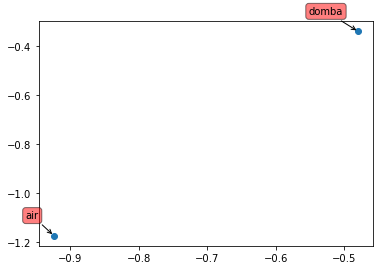

In [195]:
graph = np.array([model1.wv["air"],model1.wv["domba"]])


plot(graph, word_list)

In [194]:
print(graph)

[-0.9237569 -1.175095 ]


C3. GloVe (Global Vector for Word Representation)

1. Apa perbedaan antara metode word2vec dan GloVe ?

<h2>Jawaban</h2>

Perbedaan utama adalah cara kerja kedua metode. Word2vec adalah "predictive model" sementara GloVe adalah "Count Based Model".

Cara kerja predictive model adalah vector-vectornya dipelajari agar mengembangkan kemampuan prediksi suatu kata.

Cara kerja count-based model adalah dengan mereduksi matrix "co-occurrence". Modelnya mendapatkan matrix besar yang berisi kata dengan konteks. Kemudian dilakukan kalkulasi tertentu. Setelah itu mendapatkan data yang bisa membantu dalam mengolah kata.

2. Misalkan diberikan 2 korpus:

korpus 1 : “Saya mengerjakan tugas perolehan informasi”

korpus 2 : “Saya mengambil kuliah perolehan informasi”

Bentuk lah matriks co-occurence berdasarkan 2 korpus tersebut, dengan ketentuan
sebagai berikut:
- Gunakan setiap term yang ada pada korpus. Teman-teman tidak perlu
melakukan preprocessing seperti word removal, stemming, lemmatization, dll.
- Gunakan satu term di sebelah kanan dan satu term di sebelah kiri sebagai
konteks kemunculannya untuk setiap term yang akan dicari nilai
co-occurencenya. Sebagai contoh, misalkan terdapat korpus “informasi
perolehan informasi”, maka nilai co-occurence term “perolehan”-“informasi”
bernilai 2 (satu term setelah dan satu term sebelum term “perolehan” adalah
“informasi”), begitu pula dengan co-occurence “informasi”-”perolehan”
karena bersifat simetris.


In [118]:
matrix1 = [[0, "Saya", "mengerjakan", "tugas", "perolehan", "informasi"],
           ["Saya", 0, 1, 0, 0, 0],
           ["mengerjakan", 1, 0, 1, 0, 0],
           ["tugas", 0, 1, 0, 1, 0],
           ["perolehan", 0 , 0, 1, 0, 1],
           ["informasi", 0, 0, 0, 1, 0]]

matrix2 = [[0, "Saya", "mengambil", "kuliah", "perolehan", "informasi"],
           ["Saya", 0, 1, 0, 0, 0],
           ["mengambil", 1, 0, 1, 0, 0],
           ["kuliah", 0, 1, 0, 1, 0],
           ["perolehan", 0 , 0, 1, 0, 1],
           ["informasi", 0, 0, 0, 1, 0]]

3. Berdasarkan matriks co-occurence yang sudah dibuat pada soal nomor 2, carilah nilai
P untuk masing-masing nilai i dan j di bawah ini: −(i, j) = X−i
X−(i, j)
- i = “informasi” dan j = “perolehan”
- i = “tugas” dan j = “perolehan”,
dengan ketentuan:
- X : Korpus
- P : probabilitas kemunculan term-i dan term-j secara bersamaan −(i, j)
- X : Jumlah kemunculan term-i dan term-j secara bersamaan pada korpus −(i, j)
X
- X−(i)
: Jumlah total kemunculan term-i pada korpus X


(Saya hitung manual)
- i = “informasi” dan j = “perolehan”

X_ij_korpus_1 = 1

X_i_korpus_1 = 1

P_korpus_1 = 1/1 = 1


X_ij_korpus2 = 1

X_i_korpus2 = 1

P_korpus2 = 1/1 = 1

- i = “tugas” dan j = “perolehan”

X_ij_korpus_1 = 1

X_i_korpus_1 = 1

P_korpus_1 = 1/1 = 1


X_ij_korpus2 = 0

X_i_korpus2 = 0

P_korpus2 = 0/0 = tak terdefinisikan


4. Carilah nilai . Berdasarkan nilai tersebut, apa yang teman - P−(tugas, perolehan)
P−(informasi, perolehan)
teman dapat simpulkan mengenai relevansi antara term-term “informasi-perolehan”
dan “tugas-perolehan” ?

Untuk korpus 1 -> P(informasi,perolehan)/P(tugas,perolehan) = 1/1 = 1
Artinya di korpus 1 ada relevansi antara informasi-perolehan dan tugas-perolehan

Untuk korpus 2 -> P(informasi,perolehan)/P(tugas,perolehan) = 1/tak terderfiniskan = tak terdefinisikan
Artinya di korpus 2 informasi-perolehan dan tugas-perolehan tidak memiliki hubungan sama sekali.